# Class 2: Predicting outcomes using classification and clustering

## Context
- The basis of machine learning algorithms (Which 20% of algorithms forms the basis for 80% of problems?)
- Revisit cheatsheet shared in W1

> ***Suggested reading:***
- [KDNuggets - Top 10 Must-Know Machine Learning Algorithms for Data Scientists – Part 1](https://www.kdnuggets.com/2021/04/top-10-must-know-machine-learning-algorithms-data-scientists-1.html)
- [The Top 10 Machine Learning Algorithms Every Beginner Should Know](https://builtin.com/data-science/tour-top-10-algorithms-machine-learning-newbies)
- [Machine learning algorithms overview](https://serokell.io/blog/machine-learning-algorithm-classification-overview)

## Classification

![](ml-algs.png)
[Source: Sciencedirect - Machine learning algorithms](https://www.sciencedirect.com/topics/engineering/machine-learning-algorithm)

- Revisit types of tasks vs algorithms
- Frequently used algorithms
    - Logistic regression
    - Support vector machines
    - Decision trees
    - Random forests
    - Naive Bayes
    - KNN
    - Artificial neural networks

> ***Suggested reading:*** [Comparing different supervised machine learning algorithms for disease prediction](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-019-1004-8)

# Week overview
- 2.1 Classification with Python
    - ***ML and predictive models***
    - ***Logistic regression***
    - Worked example and practical activity
    - ***Support vector machines***
- 2.2 Decision trees
    - ***Decision trees***
    - ***Random forests***
- 2.3 Clustering
    - ***k-means clustering*** (assignment)
    - ***hierarchical clustering*** (not included in course)

# Logistic regression
- Classic application is binary classification
- Can also be used for multi-class classification problems
- Can be used for classification tasks, but also very important when we get to neural networks
    - Accuracy levels discussion in the context of neural networks and large amounts of data

> ***Suggested reading:*** [Activation functions in neural networks](https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6) and [Logistic regression and neural networks](https://sebastianraschka.com/faq/docs/logisticregr-neuralnet.html)

## Decision tree example

### One hot encoding

> ***Suggested reading:***
> - [Machine learning mastery: One hot encoding](https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/)
> - [Towards data science: label encoding and one hot encoding](https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd)

In [1]:
# External discussion part 1
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder
# define data
data = asarray([['red'], ['green'], ['blue']])
print(data)



[['red']
 ['green']
 ['blue']]


In [2]:
# External discussion part 2
# define one hot encoding
encoder = OneHotEncoder(drop='first', sparse=False)
# transform data
onehot = encoder.fit_transform(data)
print(onehot)

[[0. 1.]
 [1. 0.]
 [0. 0.]]


### Back to decision trees
- Refer to the [Scikit-Learn documentation](https://scikit-learn.org/stable/modules/tree.html) and [How is splitting decided for decision trees](https://www.displayr.com/how-is-splitting-decided-for-decision-trees/)

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_dtc_001.png)
![](https://scikit-learn.org/stable/_images/iris.svg)


### Interpretation of decision trees (classification example)
- Classification or regression
- Pruning is important (Greedy algorithms prone to overfitting)
- Accuracy optimisation (random forests, boosting/bagging) at the expense of loss of explainability

In [3]:
# [1] Import all necessary libraries:
import pandas as pd 
import numpy as np 
import scipy as scp
import sklearn
from sklearn import metrics
# Note: Provides classes and functions to estimate many different statistical methods.
import statsmodels.api as sm  

# Note: Helps split data into sets to create BLR.
from imblearn.over_sampling import SMOTE  
from sklearn.model_selection import train_test_split

# Note: Indicates situations that aren’t necessarily exceptions.
import warnings  
# [1a] Filter out any warning messages.
warnings.filterwarnings("ignore")  

# [2] Read the provided CSV file/data set.
df = pd.read_csv("w2/Data Sets/Customer_data.csv")  

# [3] Print a summary of the DataFrame to sense-check it.
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            41188 non-null  int64  
 1   Occupation     41188 non-null  object 
 2   Status         41188 non-null  object 
 3   Edu            41188 non-null  object 
 4   House          41188 non-null  object 
 5   Loan           41188 non-null  object 
 6   Comm           41188 non-null  object 
 7   Month          41188 non-null  object 
 8   DOW            41188 non-null  object 
 9   Duration       41188 non-null  int64  
 10  Campaign       41188 non-null  int64  
 11  PosDays        41188 non-null  int64  
 12  Last_out       41188 non-null  object 
 13  Var_rate       41188 non-null  float64
 14  Price_idx      41188 non-null  float64
 15  Conf_idx       41188 non-null  float64
 16  Month_rate     41188 non-null  float64
 17  Quarterly_emp  41188 non-null  float64
 18  Target

In [4]:
# [1] Update all the details of the education column:
df.loc[df['Edu'].str.contains('basic'),'Edu' ] = 'pre-school'
df.loc[df['Edu'].str.contains('university'),'Edu' ] = 'uni'
df.loc[df['Edu'].str.contains('high'),'Edu' ] = 'high-school'
df.loc[df['Edu'].str.contains('professional') ,'Edu'] = 'masters'
df.loc[df['Edu'].str.contains('illiterate'),'Edu' ] = 'other'
df.loc[df['Edu'].str.contains('unknown'),'Edu' ] = 'other'

# [2] Display all the unique values/check changes.
df['Edu'].unique() 

array(['pre-school', 'other', 'uni', 'high-school', 'masters'],
      dtype=object)

In [5]:
# [1] Name new DataFrame and convert categorical variables to dummy variables:
cat_vars=['Occupation','Status','Edu','House','Loan',
          'Comm','Month','DOW','Last_out']

# [2] Use the for loop keyword to specify what actions to
# apply to all the 'var' items:
# [2a] Specify what needs to apply to all the variables.
for var in cat_vars:  
    # cat_list='var'+'_'+var
    # [2b] Specify details of the categorical list.
    cat_list = pd.get_dummies(df[var], prefix=var)  
    # [2c] Indicate the joining of the DataFrames.
    df=df.join(cat_list) 

df_fin = df.drop(cat_vars,axis=1) 

# [3] Specify the column names:
cat_vars=['Occupation','Status','Edu','House','Loan',
          'Comm','Month','DOW','Last_out']

# [4] Set a temporary DataFrame and add values.
df_vars=df.columns.values.tolist()  

# [5] Indicate what columns are kept.
to_keep=[i for i in df_vars if i not in cat_vars] 

# [6] Define new DataFrame.
df_fin=df[to_keep]  

# [7] Print the column.
df_fin.columns.values

array(['Age', 'Duration', 'Campaign', 'PosDays', 'Var_rate', 'Price_idx',
       'Conf_idx', 'Month_rate', 'Quarterly_emp', 'Target',
       'Occupation_admin.', 'Occupation_blue-collar',
       'Occupation_entrepreneur', 'Occupation_housemaid',
       'Occupation_management', 'Occupation_retired',
       'Occupation_self-employed', 'Occupation_services',
       'Occupation_student', 'Occupation_technician',
       'Occupation_unemployed', 'Occupation_unknown', 'Status_divorced',
       'Status_married', 'Status_single', 'Status_unknown',
       'Edu_high-school', 'Edu_masters', 'Edu_other', 'Edu_pre-school',
       'Edu_uni', 'House_no', 'House_unknown', 'House_yes', 'Loan_no',
       'Loan_unknown', 'Loan_yes', 'Comm_cellular', 'Comm_telephone',
       'Month_apr', 'Month_aug', 'Month_dec', 'Month_jul', 'Month_jun',
       'Month_mar', 'Month_may', 'Month_nov', 'Month_oct', 'Month_sep',
       'DOW_fri', 'DOW_mon', 'DOW_thu', 'DOW_tue', 'DOW_wed',
       'Last_out_failure', 'Last_out

In [6]:
# NOTE MY CHANGES

# [1] Create a DataFrame to use as df_fin and replace missing values with zero.
df_fin = df_fin.fillna(0)  

# [2] Select necessary columns: 
nec_cols = [ 'Status_divorced', 'Status_married',
            'Status_single', 'Status_unknown', 
            'Edu_high-school', 'Edu_masters', 
            'Edu_other', 'Edu_pre-school', 
            'Edu_uni', 'House_no', 'House_unknown',
            'House_yes', 'Loan_no', 'Loan_unknown', 
            'Loan_yes', 'DOW_fri', 'DOW_mon']

X = df_fin[nec_cols]
y = df_fin['Target']

# [3] Create a new DataFrame and 
# [3a] apply SMOTE as the target variable is not balanced.
#os = SMOTE(random_state=0)  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# [4] Specify column values.
columns = X_train.columns  
# [5] Specify the new data sets.
#os_data_X,os_data_y=os.fit_resample(X_train, y_train)  

# [6] Create two DataFrames for X and one for y:
#os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
#os_data_y= pd.DataFrame(data=os_data_y,columns=['Target'])

# [7] Print/check the DataFrame:
#print("length of oversampled data is ",len(os_data_X))

#os_data_y

In [7]:
# NOTE MY CHANGES

# [1] Import the ‘DecisionTreeClassifier’ class from sklearn. 
from sklearn.tree import DecisionTreeClassifier  

# [2] Create a classification decision tree classifier object as ‘dtc’: 
dtc = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)

# [3] Train the decision tree classifier.
dtc = dtc.fit(X_train, y_train) 

# [4] Predict the response for the test data set.
y_pred = dtc.predict(X_test)  

In [8]:
# [1] Import scikit-learn metrics module for accuracy calculation:
from sklearn.metrics import confusion_matrix

# [2] Use the ‘print()’ function to display the confusion matrix results:
print(confusion_matrix(y_test, y_pred))

# [3a] Metrics for ‘accuracy’.
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 
# [3b] Metrics for ‘precision’. 
print("Precision:",metrics.precision_score(y_test, y_pred))  
# [3c] Metrics for ‘recall’.
print("Recall:",metrics.recall_score(y_test, y_pred)) 

[[10981     0]
 [ 1376     0]]
Accuracy: 0.88864611151574
Precision: 0.0
Recall: 0.0


In [9]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     10981
           1       0.00      0.00      0.00      1376

    accuracy                           0.89     12357
   macro avg       0.44      0.50      0.47     12357
weighted avg       0.79      0.89      0.84     12357



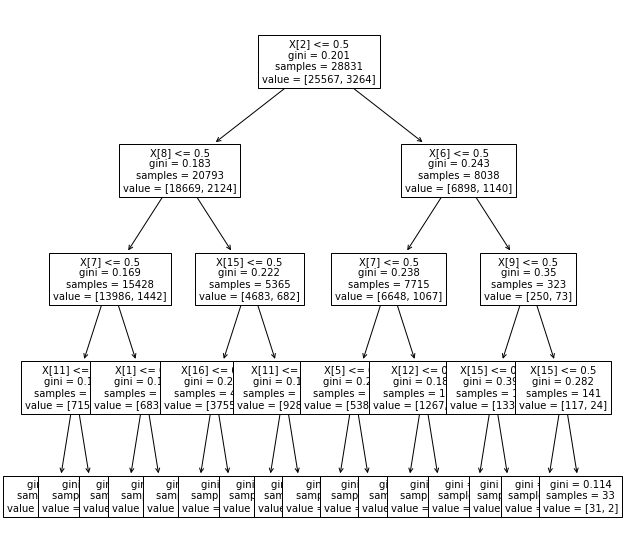

In [10]:
# [1] Import matplotlib to create a visualisation 
# and the ‘tree’ package from sklearn:
import matplotlib.pyplot as plt 
from sklearn import tree

# [2] Plot the decision tree to create the visualisation:
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(dtc, fontsize=10)

# [3] Print the plot with plt.show().
plt.show() 

# Additional information / Pruning
- Highly recommended: https://machinelearningmastery.com/classification-and-regression-trees-for-machine-learning/
- More detailed/advanced: https://machinelearningmastery.com/implement-decision-tree-algorithm-scratch-python/

***Extract from the first link: Pruning***

> The stopping criterion is important as it strongly influences the performance of your tree. You can use pruning after learning your tree to further lift performance.

> The complexity of a decision tree is defined as the number of splits in the tree. Simpler trees are preferred. They are easy to understand (you can print them out and show them to subject matter experts), and they are less likely to overfit your data.

> The fastest and simplest pruning method is to work through each leaf node in the tree and evaluate the effect of removing it using a hold-out test set. Leaf nodes are removed only if it results in a drop in the overall cost function on the entire test set. You stop removing nodes when no further improvements can be made.

> More sophisticated pruning methods can be used such as cost complexity pruning (also called weakest link pruning) where a learning parameter (alpha) is used to weigh whether nodes can be removed based on the size of the sub-tree.

#### Pruning examples
- [Towardsdatascience](https://towardsdatascience.com/build-better-decision-trees-with-pruning-8f467e73b107)
- [Medium](https://medium.com/analytics-vidhya/post-pruning-and-pre-pruning-in-decision-tree-561f3df73e65)

#### Scikit-learn documentation: 
- [Decision tree](https://scikit-learn.org/stable/modules/tree.html#tree) (note the use of graphviz)
- [Decision tree classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)


In [11]:
# alt vis?

## Clustering

### Scikit-learn
- [K-Means](https://scikit-learn.org/stable/modules/clustering.html#k-means)
- [Ward hierarchical clustering](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering) (additional)
- [Overview of clustering methods available](https://scikit-learn.org/stable/modules/clustering.html)

Hierarchical clustering output
![](https://scikit-learn.org/stable/_images/sphx_glr_plot_agglomerative_dendrogram_001.png)

Additional (optional reading): [Hierarchical clustering](https://towardsdatascience.com/a-practical-introduction-to-hierarchical-clustering-from-scikit-learn-ffaf8ee2670c)

# Clustering example (highly recommended up to pipelines)
https://realpython.com/k-means-clustering-python/

Iterations
![](https://files.realpython.com/media/centroids_iterations.247379590275.gif)

Elbow method
![](https://files.realpython.com/media/elbow_method.f10515cf445d.png)

Silhouette method
![](https://files.realpython.com/media/silhouette_scores.9e4e63c679ef.png)

#### Reference documentation

- [Scikit-learn K-means clustering](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html#sphx-glr-auto-examples-cluster-plot-cluster-iris-py)

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_iris_004.png)

#### Another great example that is recommended to be reviewed prior to working through the example
- [Kaggle Iris data clustering example](https://www.kaggle.com/code/khotijahs1/k-means-clustering-of-iris-dataset/notebook)


## Clustering example from notes

In [12]:
# [1] import libraries
import pandas as pd
import numpy as np

# [2] read the csv file
df_fb = pd.read_csv("w2/Data Sets/FB.csv")

# [3] view the DataFrame
print(df_fb.shape)
print(df_fb.dtypes)
df_fb.head()

(13397, 14)
fb_id         int64
medium       object
published    object
reactions     int64
comments      int64
share         int64
like          int64
love          int64
excellent     int64
funny         int64
sad           int64
angry         int64
yes           int64
no            int64
dtype: object


,fb_id,medium,published,reactions,comments,share,like,love,excellent,funny,sad,angry,yes,no
0,12987653,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,1,0
1,12987654,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,1,0
2,12987655,photo,3/21/2017 0:24,33,9,1,33,0,0,0,0,0,0,1
3,12987656,photo,3/21/2017 0:23,72,1,0,72,0,0,0,0,0,0,1
4,12987657,photo,3/21/2017 0:13,174,0,0,173,1,0,0,0,0,0,1


In [13]:
# Display a summary of the numeric variables.
df_fb.describe() 

,fb_id,reactions,comments,share,like,love,excellent,funny,sad,angry,yes,no
count,1.339700e+04,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000
mean,1.299435e+07,375.496007,187.822348,27.894379,364.123460,9.523475,0.999030,0.499515,0.259984,0.085318,0.518997,0.481003
std,3.867525e+03,615.082883,922.957579,106.823723,611.454156,31.672009,6.464646,3.002503,1.796688,0.706974,0.499658,0.499658
min,1.298765e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.299100e+07,32.000000,1.000000,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.299435e+07,136.000000,7.000000,0.000000,122.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.299770e+07,351.000000,21.000000,3.000000,327.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.300105e+07,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,1.000000,1.000000


In [14]:
# [1] Employ the drop() function and 
# [2] indicate the element to drop:
df_fb.drop(['fb_id', 'published'], axis=1, inplace=True)

# [3] Display the column names.
df_fb.columns 

Index(['medium', 'reactions', 'comments', 'share', 'like', 'love', 'excellent',
       'funny', 'sad', 'angry', 'yes', 'no'],
      dtype='object')

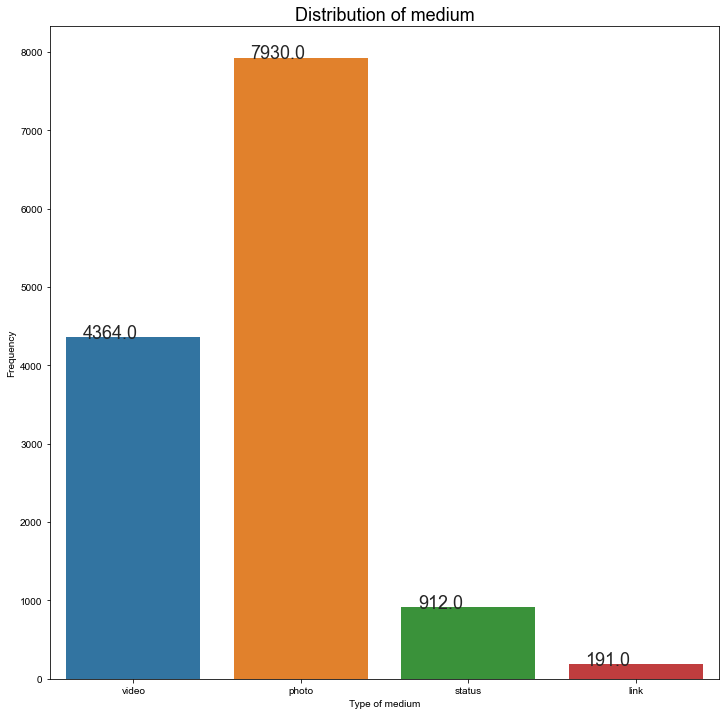

In [15]:
# [1] Import the necessary packages:
from matplotlib import pyplot as plt
import seaborn as sns

# [2] Generate the overall frame and [2a, b] the bars for the plot:
plt.figure(figsize=(12, 12))
ax = sns.countplot(x="medium", data=df_fb)
sns.set(font_scale = 1.5)
sns.set_style("white")

# [3] Specify the plot title, x-axis label, and the y-axis label:
plt.title('Distribution of medium')
plt.xlabel('Type of medium')
plt.ylabel('Frequency')

# [4] Annotate the bars with values:
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50), va='center') 

# key: 3=video, 2=status, 1=photo, 0=link


In [16]:
# Define the independent variable.
X = df_fb 
# Define the dependent variable.
y = df_fb['medium']

In [17]:
# [1] Import the LabelEncoder class:
from sklearn.preprocessing import LabelEncoder

# [2] Create an object from the class.
le = LabelEncoder() 

# [3] Modify the DataFrame column with integer values:
X['medium'] = le.fit_transform(X['medium'])

y = le.transform(y)

In [18]:
# Check that label encoding happened correctly using the ‘info()’ method:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13397 entries, 0 to 13396
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   medium     13397 non-null  int64
 1   reactions  13397 non-null  int64
 2   comments   13397 non-null  int64
 3   share      13397 non-null  int64
 4   like       13397 non-null  int64
 5   love       13397 non-null  int64
 6   excellent  13397 non-null  int64
 7   funny      13397 non-null  int64
 8   sad        13397 non-null  int64
 9   angry      13397 non-null  int64
 10  yes        13397 non-null  int64
 11  no         13397 non-null  int64
dtypes: int64(12)
memory usage: 1.2 MB


In [19]:
# Normalisation recommended but not always performed

# [1] Create an list with the column labels from X:
x_cols = X.columns

# [2] Import the MinMaxScaler class.
from sklearn.preprocessing import MinMaxScaler 

# [3] Create the object from ‘MinMaxScaler’.
ms = MinMaxScaler() 
# [4] Modify X to scale values between 0 and 1.
X = ms.fit_transform(X) 
# [5] Set X as equal to a new DataFrame.
X = pd.DataFrame(X, columns=[x_cols]) 

# [6] Check the contents of the modified DataFrame.
X.head() 

,medium,reactions,comments,share,like,love,excellent,funny,sad,angry,yes,no
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,1.0,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0
2,0.333333,0.007006,0.000429,0.000292,0.007006,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0
3,0.333333,0.015287,0.000048,0.000000,0.015287,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0
4,0.333333,0.036943,0.000000,0.000000,0.036730,0.001522,0.000000,0.000000,0.000000,0.0,0.0,1.0


In [20]:
# [1] Import the KMeans class.
from sklearn.cluster import KMeans 

# [2] Create the object and [2a] specify the parameters:
kmeans = KMeans(n_clusters=2, random_state=0)

# [3] Fit the k means to the data set. 
kmeans.fit(X) 

KMeans(n_clusters=2, random_state=0)

In [23]:
# Note that I received an error here, traced it to an issue with a specific numpy version
#np.__version__
#pip install --force-reinstall numpy==1.21.4

In [24]:
# Indicate ‘kmeans()’ applies to ‘cluster_centers’. 
kmeans.cluster_centers_

array([[ 5.63676805e-01,  7.97700522e-02,  9.95437217e-03,
         8.62467332e-03,  7.72335167e-02,  1.53255728e-02,
         3.47878122e-03,  3.54252413e-03,  5.34012488e-03,
         2.56302437e-03,  4.55191440e-15,  1.00000000e+00],
       [ 5.72846253e-01,  7.96796690e-02,  8.01565154e-03,
         7.70376130e-03,  7.73781682e-02,  1.37259937e-02,
         3.70007460e-03,  2.84714200e-03,  4.87305522e-03,
         2.92749011e-03,  1.00000000e+00, -4.66293670e-15]])

In [25]:
# Check the inertia for the data set.
kmeans.inertia_ 

1881.3383018237319

In [26]:
# [1] Extract the labels from the k means.
labels = kmeans.labels_ 

# [2] Add up correctly labelled instances. 
correct_labels = sum(y == labels) 

 # [3] Display the result.
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 4157 out of 13397 samples were correctly labeled.


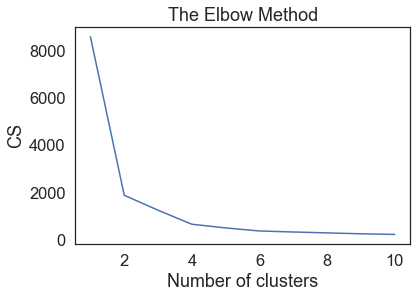

In [27]:
#elbow chart for us to decide on the number of optimal clusters
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()
#From the below chart we can take the optimal number as 4 

In [28]:
# [1] Create a k-means object with three clusters:
kmeans = KMeans(n_clusters=3, random_state=0)
# [2] Apply ‘fit()’, using the DataFrame, to the k-means object.
kmeans.fit(X) 

# [3] Check how many of the samples were correctly labelled:
labels = kmeans.labels_
correct_labels = sum(y == labels)

# [4] Display the accuracy score:
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 4665 out of 13397 samples were correctly labeled.
Accuracy score: 0.35


In [29]:
# [1] Create a k-means object with three clusters:
kmeans = KMeans(n_clusters=4, random_state=0)
# [2] Apply ‘fit()’, using the DataFrame, to the k-means object.
kmeans.fit(X) 

# [3] Check how many of the samples were correctly labelled:
labels = kmeans.labels_
correct_labels = sum(y == labels)

# [4] Display the accuracy score:
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size))) 

Result: 6545 out of 13397 samples were correctly labeled.
Accuracy score: 0.49


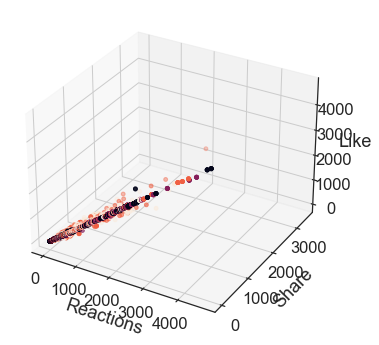

In [30]:
# [1] Create the figure area.
fig = plt.figure(figsize=(26,6)) 
# [2] Create a 3D projection area.
ax = fig.add_subplot(131, projection='3d') 

# [3] Create a 3D scatter plot and specify the data source for each axis:
ax.scatter(df_fb['reactions'], df_fb['share'], 
 df_fb['like'], c=labels, s=15)

# [4] Set the label for each dimension:
ax.set_xlabel('Reactions')
ax.set_ylabel('Share')
ax.set_zlabel('Like')

# [5] Show the plot.
plt.show() 

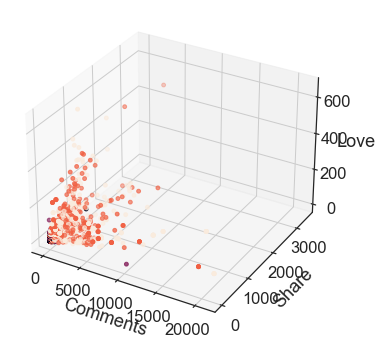

In [31]:
# [1] Create the figure area.
fig = plt.figure(figsize=(26,6)) 

# [2] Create a 3D projection area.
ax = fig.add_subplot(131, projection='3d') 

# [3] Create a 3D scatter plot and specify the data source for each axis:
ax.scatter(df_fb['comments'], df_fb['share'], 
 df_fb['love'], c=labels, s=15)

# [4] Set the label for each dimension:
ax.set_xlabel('Comments')
ax.set_ylabel('Share')
ax.set_zlabel('Love')

# [5] Show the plot.
plt.show() 

# Additional information
https://machinelearningknowledge.ai/tutorial-for-k-means-clustering-in-python-sklearn/
- Note that we often use a combination of the elbow and silhouette methods to inform the number of clusters to be used
- Also informed by business knowledge

# Other links
- [Formatted printing](https://www.geeksforgeeks.org/python-output-formatting/)